# HDA Demo Preprocessing

In [15]:
from final_pipeline import *

In [22]:
case_id = 4551

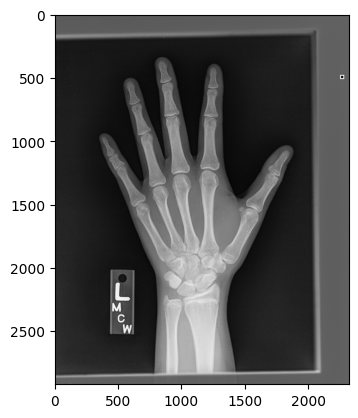

In [23]:
image = cv2.imread(f'./data/test/images/{case_id}.png', 0)
_ = plt.imshow(image, cmap='gray')

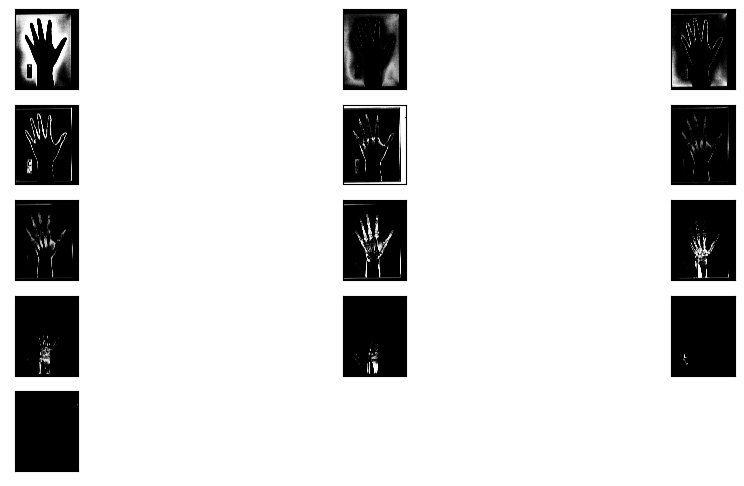

In [24]:
components = get_components(image)
plt.figure(figsize=(12, 6))
plot_side_by_side(components, max_per_column=3, labels=False)

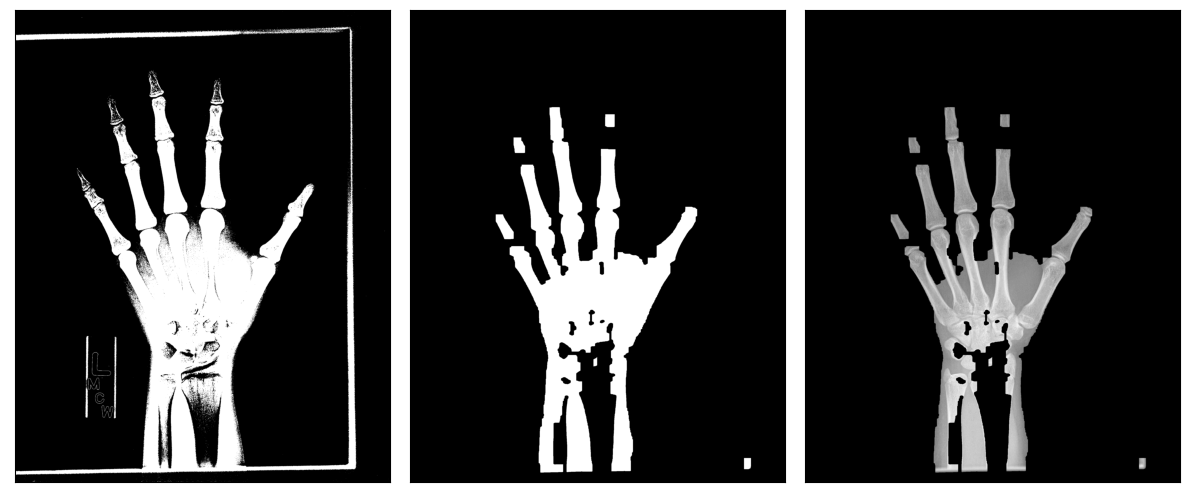

In [25]:
original_mask = get_hand_components(image)

mask = remove_noise(original_mask.copy())
mask = remove_lines(mask, line_width=15)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

mask = mask == 255
masked = image.copy()
masked[~mask] = 0

plt.figure(figsize=(12, 6))
plot_side_by_side([original_mask, mask, masked], labels=False)
plt.tight_layout()

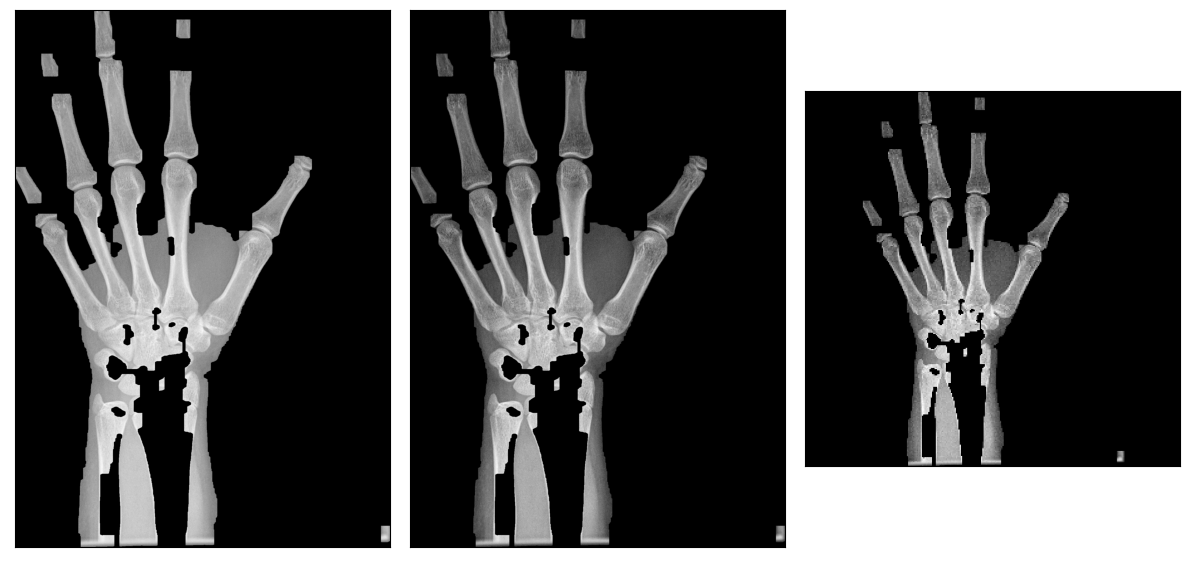

In [26]:
y_nonzero, x_nonzero = np.nonzero(masked)
cropped = masked[np.min(y_nonzero):np.max(y_nonzero), np.min(x_nonzero):np.max(x_nonzero)]

minval = np.min(cropped[np.nonzero(cropped)])
maxval = np.max(cropped[np.nonzero(cropped)])
rescaled = np.interp(cropped, (minval, maxval), (0, 255))
rescaled = rescaled.astype(np.uint8)

resized = reshape(rescaled, 299)

plt.figure(figsize=(12, 6))
plot_side_by_side([cropped, rescaled, resized], labels=False)
plt.tight_layout()

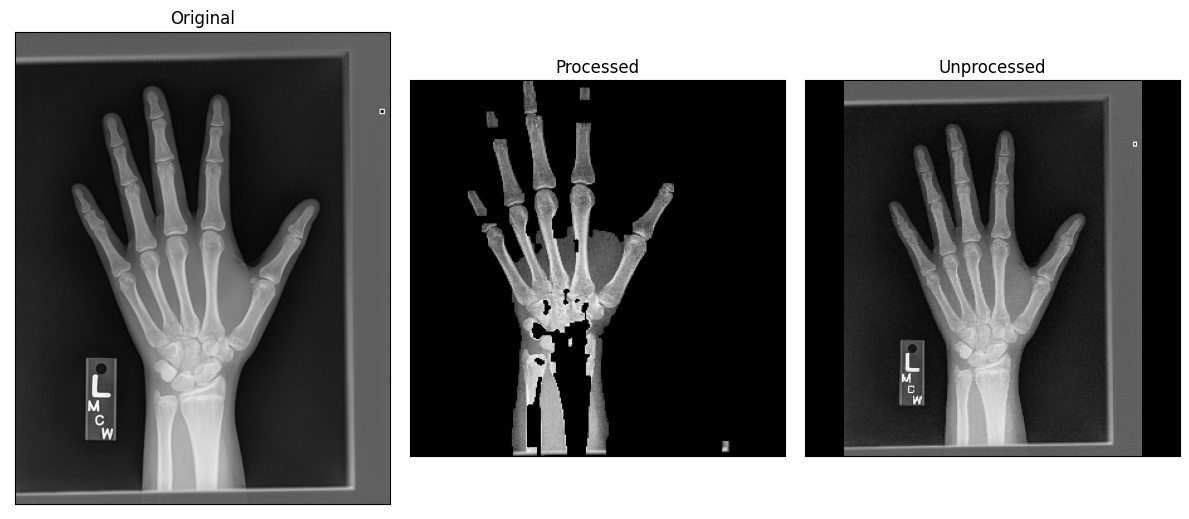

In [27]:
processed_image = process_image(image)
unprocessed_image = reshape(image, 299)
plt.figure(figsize=(12, 6))
plot_side_by_side([image, processed_image, unprocessed_image], ['Original', 'Processed', 'Unprocessed'], labels=False)
plt.tight_layout()